# Initialize and Setup

In [10]:
import os
import time

import numpy as np
from sklearn.neural_network import MLPClassifier

import ml_util as utl

save_directory = "figures/NeuralNetwork"
model_name = "Neural Network"

folders = ["figures/NeuralNetwork/Complexity_Analysis",
           "figures/NeuralNetwork/Grid_Search_Results",
           "figures/NeuralNetwork/Learning_Curves",
           "figures/NeuralNetwork/Confusion_Matrix",
           "figures/NeuralNetwork/Metrics"]

directories = {
    "Save Directory": "figures/NeuralNetwork",
    "Initial Complexity Analysis": "figures/NeuralNetwork/Initial Complexity Analysis",
    "Grid Search Results": "figures/NeuralNetwork/Grid Search Results",
    "Learning Curves": "figures/NeuralNetwork/Learning Curves",
    "Final Complexity Analysis": "figures/NeuralNetwork/Final Complexity Analysis"
}

Random_Number = 42
n_jobs = -1
TESTING = False
cv = 5
np.random.seed(42)
get_ipython().system('pip install pyarrow')

In [11]:
gathered_data = utl.setup(["MNIST"])
gathered_data_fashion = utl.setup(["Fashion-MNIST"])
train_X, train_y, valid_X, valid_y, test_X, test_y = utl.split_data(gathered_data["MNIST"]["X"],
                                                                    gathered_data["MNIST"]["y"], normalize=True)
fashion_train_X, fashion_train_y, fashion_valid_X, fashion_valid_y, fashion_test_X, fashion_test_y = utl.split_data(
    gathered_data_fashion["Fashion-MNIST"]["X"],
    gathered_data_fashion["Fashion-MNIST"]["y"],
    normalize=True)

dataset folder already exists.
MNIST dataset found:
	Loading MNIST.feather
	Finished loading MNIST dataset
dataset folder already exists.
Fashion-MNIST dataset found:
	Loading Fashion-MNIST.feather
	Finished loading Fashion-MNIST dataset


In [12]:
CHECK_FOLDER = os.path.isdir(save_directory)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(save_directory)
    print("created folder : ", save_directory)
else:
    print(save_directory, "folder already exists.")

for f in folders:
    if not os.path.isdir(f):
        os.makedirs(f)
        print("created folder : ", f)
    else:
        print(f, "folder already exists.")

figures/NeuralNetwork folder already exists.
figures/NeuralNetwork/Complexity_Analysis folder already exists.
figures/NeuralNetwork/Grid_Search_Results folder already exists.
figures/NeuralNetwork/Learning_Curves folder already exists.
figures/NeuralNetwork/Confusion_Matrix folder already exists.
figures/NeuralNetwork/Metrics folder already exists.


In [4]:
mnist_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
fashion_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag",
                 "Ankle boot"]

created folder :  NN_Figures


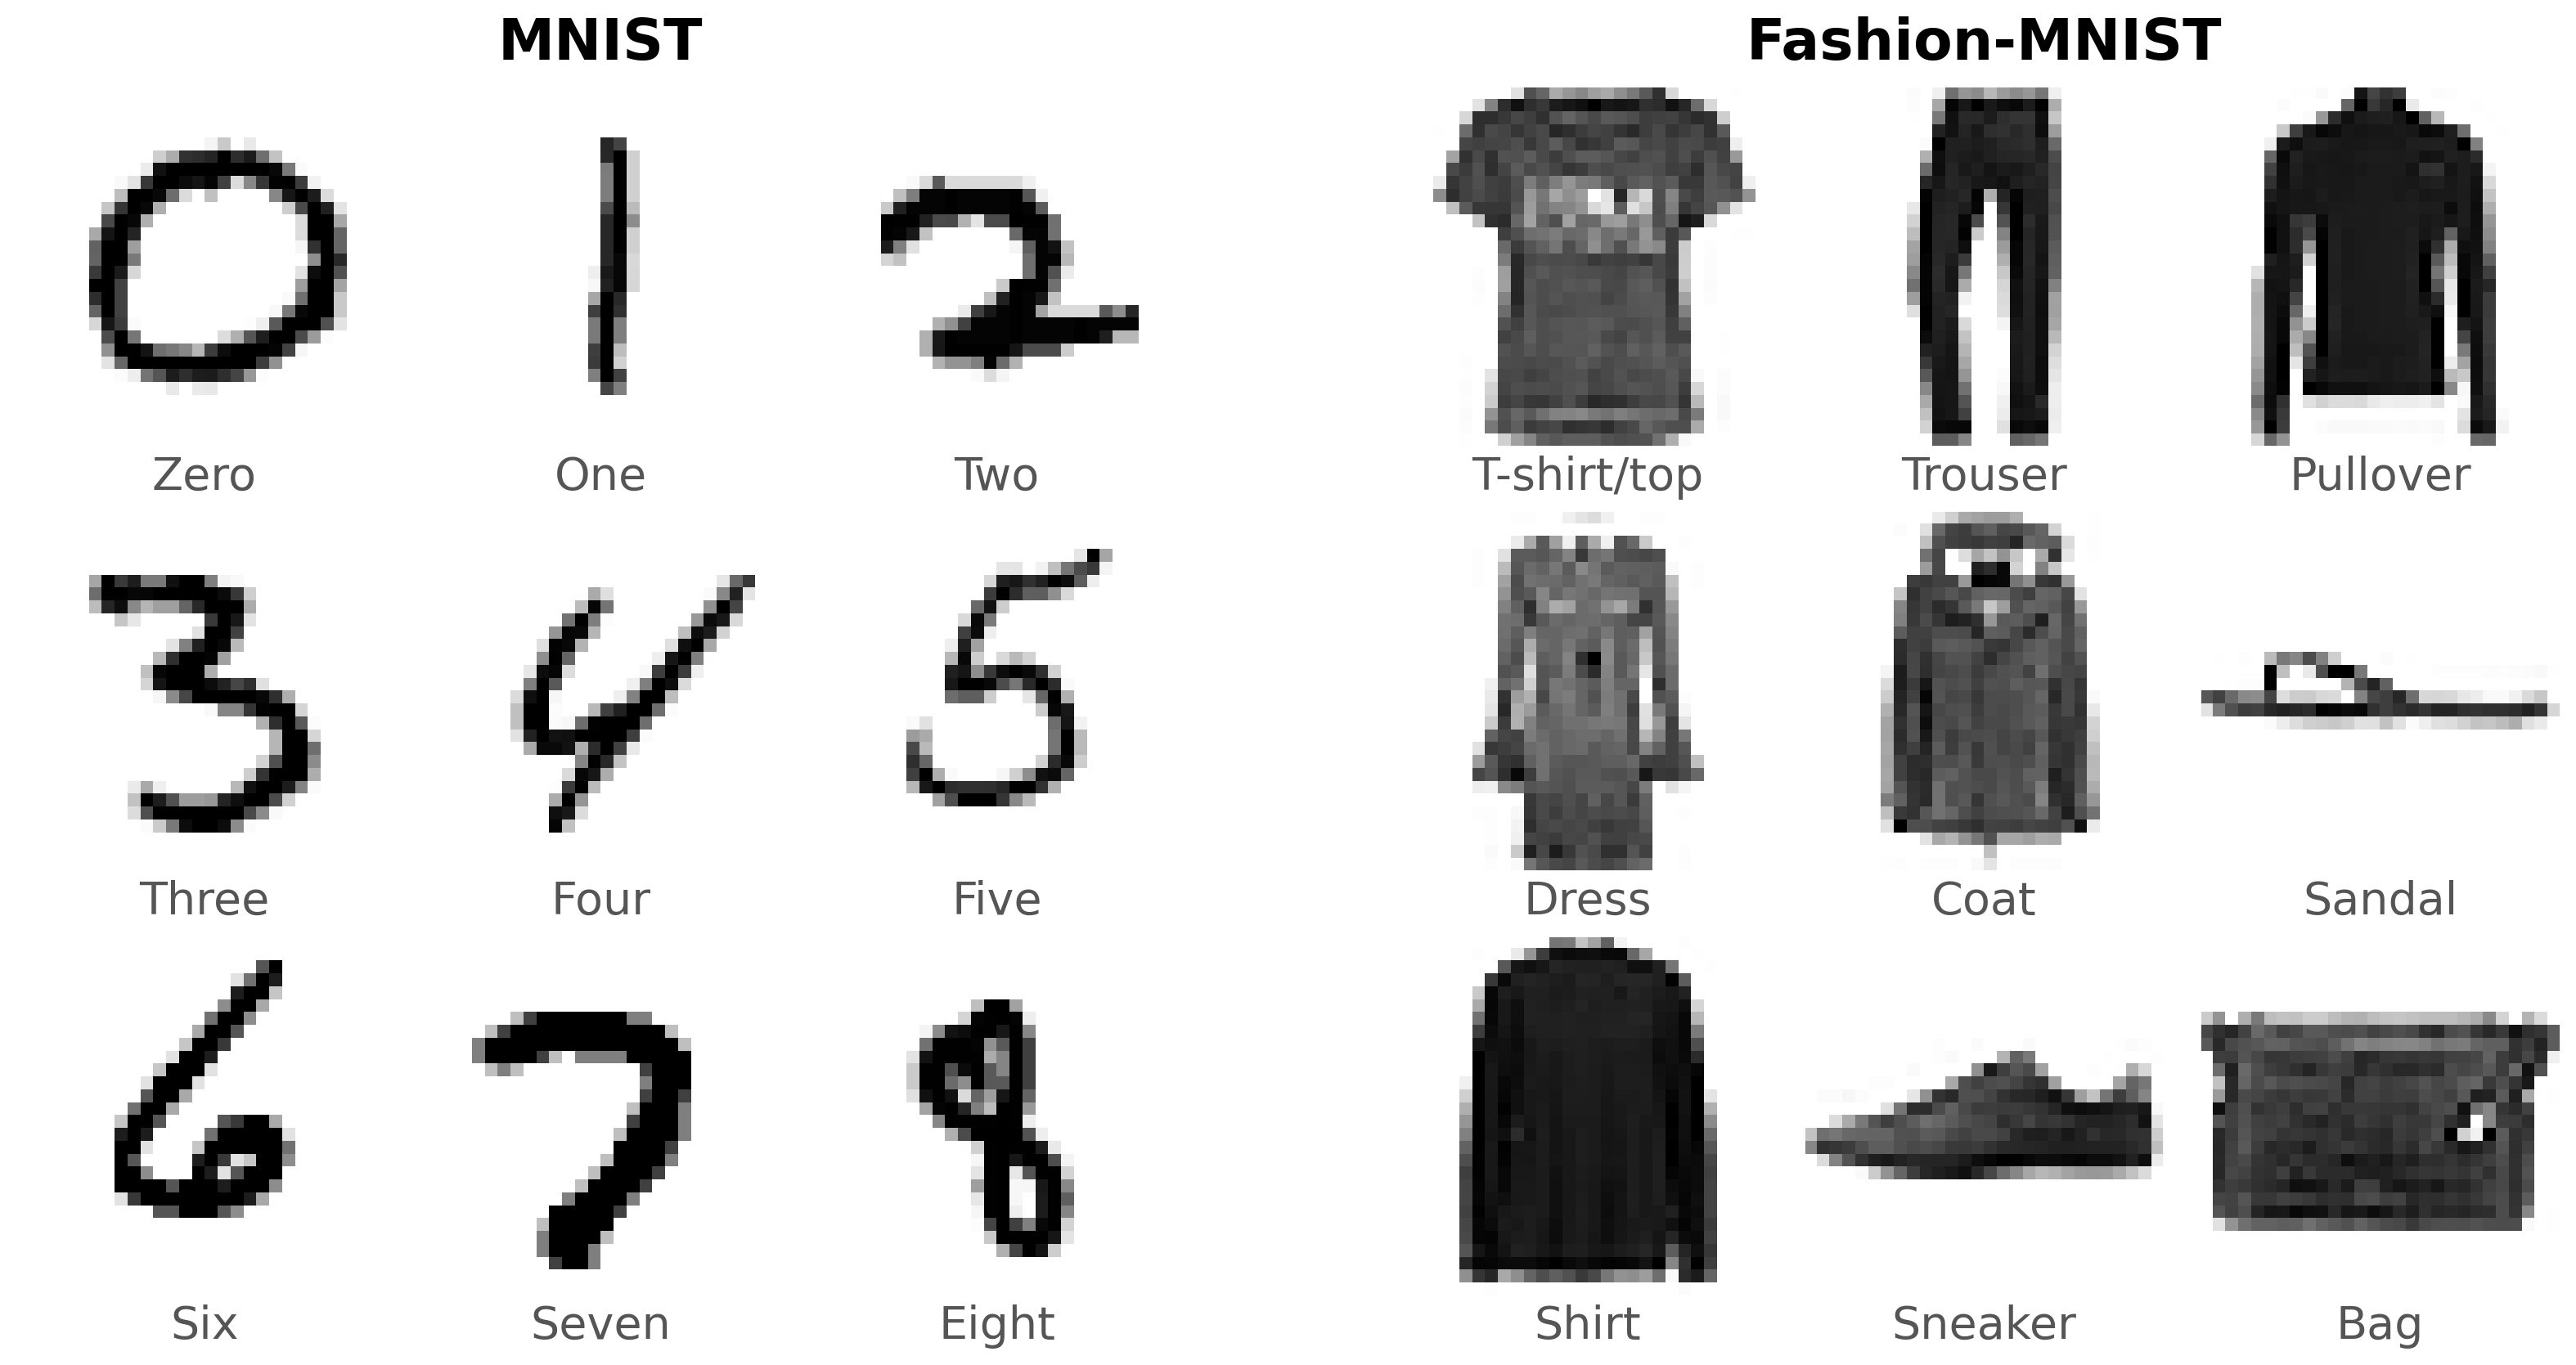

In [13]:
utl.combined_generate_image_grid(class_one_names=mnist_names, class_two_names=fashion_names, 
                                 data1_X=train_X.to_numpy(), data1_y=train_y.to_numpy(),
                                 data2_X=fashion_train_X.to_numpy(), data2_y=fashion_train_y.to_numpy(),
                                 save_dir="NN_Figures")

In [6]:
# Hidden Layer Sizes (100), suggests there is an input layer connected to a hidden layer with 100 nodes. (100,100) suggests
#    that there is an input layer connected to a hidden layer with 100 nodes, which is then connected to another hidden
#    layer with 100 nodes

# Solver ~ 'adam': stochastic gradient based optimizer (works well on larger datasets)
#          'lbfgs': works well on smaller datasets
#          'sgd': stochastic gradient descent

# Warmstart allows to train multiple times on same dataset using results from previous training session


if TESTING:
    val = 600
    pred_val = 600
    train_sizes = np.linspace(0.05, 1.0, 5)
else:
    val = 1000
    pred_val = 1000
    train_sizes = np.linspace(0.05, 1.0, 20)

# Initial Model Complexity: Hidden Layer Sizes

In [7]:
if TESTING:
    rng = np.arange(10, 17, 2)
else:
    rng = np.arange(10, 151, 10)
parameter_range = [(i,) for i in rng]
param_name = "hidden_layer_sizes"
param_name_plot = "Hidden Layer Sizes"
print(parameter_range)
results = {"MNIST": None,
           "Fashion MNIST": None}
mnist_train_results = None
mnist_test_results = None
fashion_train_results = None
fashion_test_results = None

[(10,), (20,), (30,), (40,), (50,), (60,), (70,), (80,), (90,), (100,), (110,), (120,), (130,), (140,), (150,)]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  75 | elapsed:   26.7s remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  28 out of  75 | elapsed:   53.6s remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  44 out of  75 | elapsed:  1.3min remaining:   55.9s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:  1.8min remaining:   26.4s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  75 | elapsed:   32.5s remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  28 out of  75 | elapsed:  1.2min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  44 out of  75 | elapsed:  1.8min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:  2.4min remaining:   35.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  2.9min finished


Run Time: 303.1182932853699s


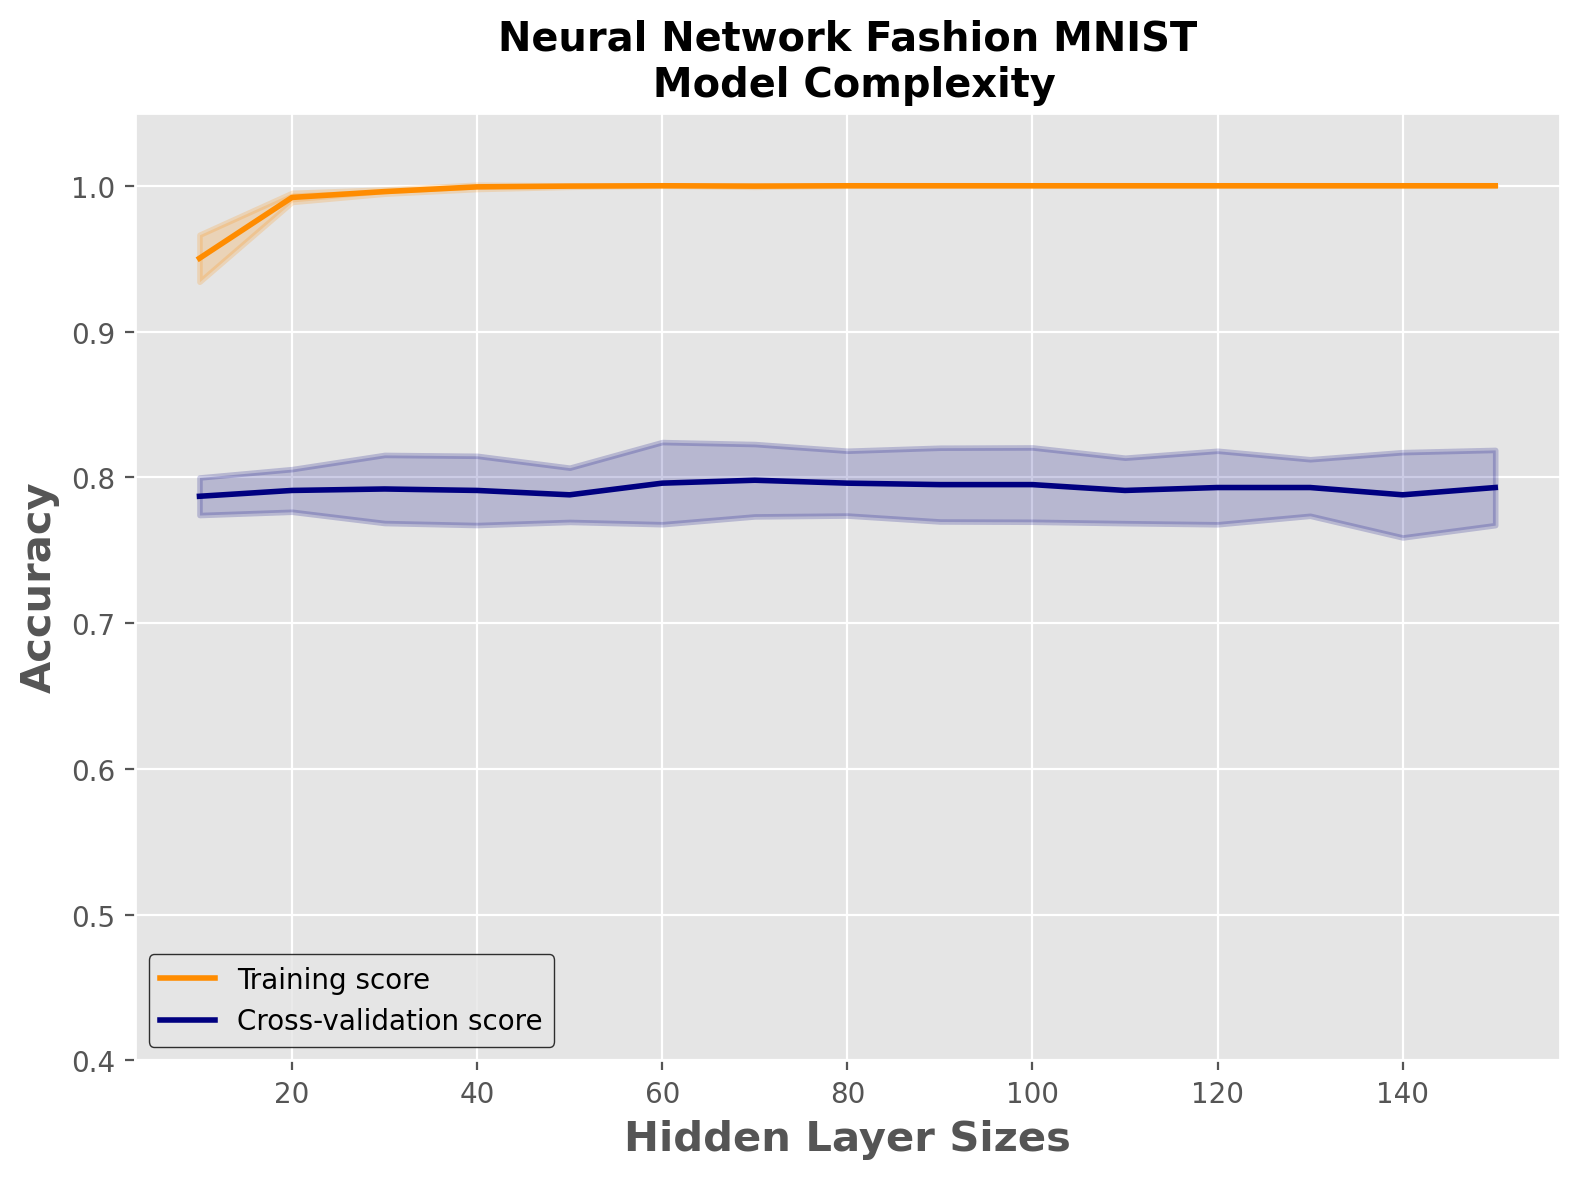

In [8]:
start_time = time.time()
for i in np.arange(2):
    temp_results = {"Training Results": None,
                    "Testing Results": None}
    if i == 0:
        temp_train_X = train_X.iloc[:val, :]
        temp_train_y = train_y.iloc[:val]
        f_name = f"{model_name}_{param_name}_MNIST"
        algorithm_name = f"{model_name} {param_name} MNIST\n Model Complexity"
        plot_title = f"{model_name} MNIST\n Model Complexity"
        ex="MNIST_Layer_MCC"
    else:
        temp_train_X = fashion_train_X.iloc[:val, :]
        temp_train_y = fashion_train_y.iloc[:val]
        f_name = f"{model_name}_{param_name}_Fashion_MNIST"
        algorithm_name = f"{model_name} {param_name} Fashion MNIST\n Model Complexity"
        plot_title = f"{model_name} Fashion MNIST\n Model Complexity"
        ex="FashionMNIST_Layer_MCC"
    
    temp_train, temp_test = utl.get_model_complexity(classifier=MLPClassifier(), train_X=temp_train_X,
                                                     train_y=temp_train_y, parameter_name=param_name,
                                                     save_dir=save_directory,
                                                     algorithm_name=algorithm_name, parameter_range=parameter_range,
                                                     cv=5,
                                                     n_jobs=n_jobs, verbose=5, backend='loky',
                                                     param_name_for_plot=param_name_plot, f_name=f_name,
                                                     is_NN=True, nn_range=rng, plot_title=plot_title,
                                                     folder="NeuralNetwork", fileName=ex)
    if i == 0:
        mnist_train_results = temp_train
        mnist_test_results = temp_test
    else:
        fashion_train_results = temp_train
        fashion_test_results = temp_test

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Run Time: {elapsed_time}s")

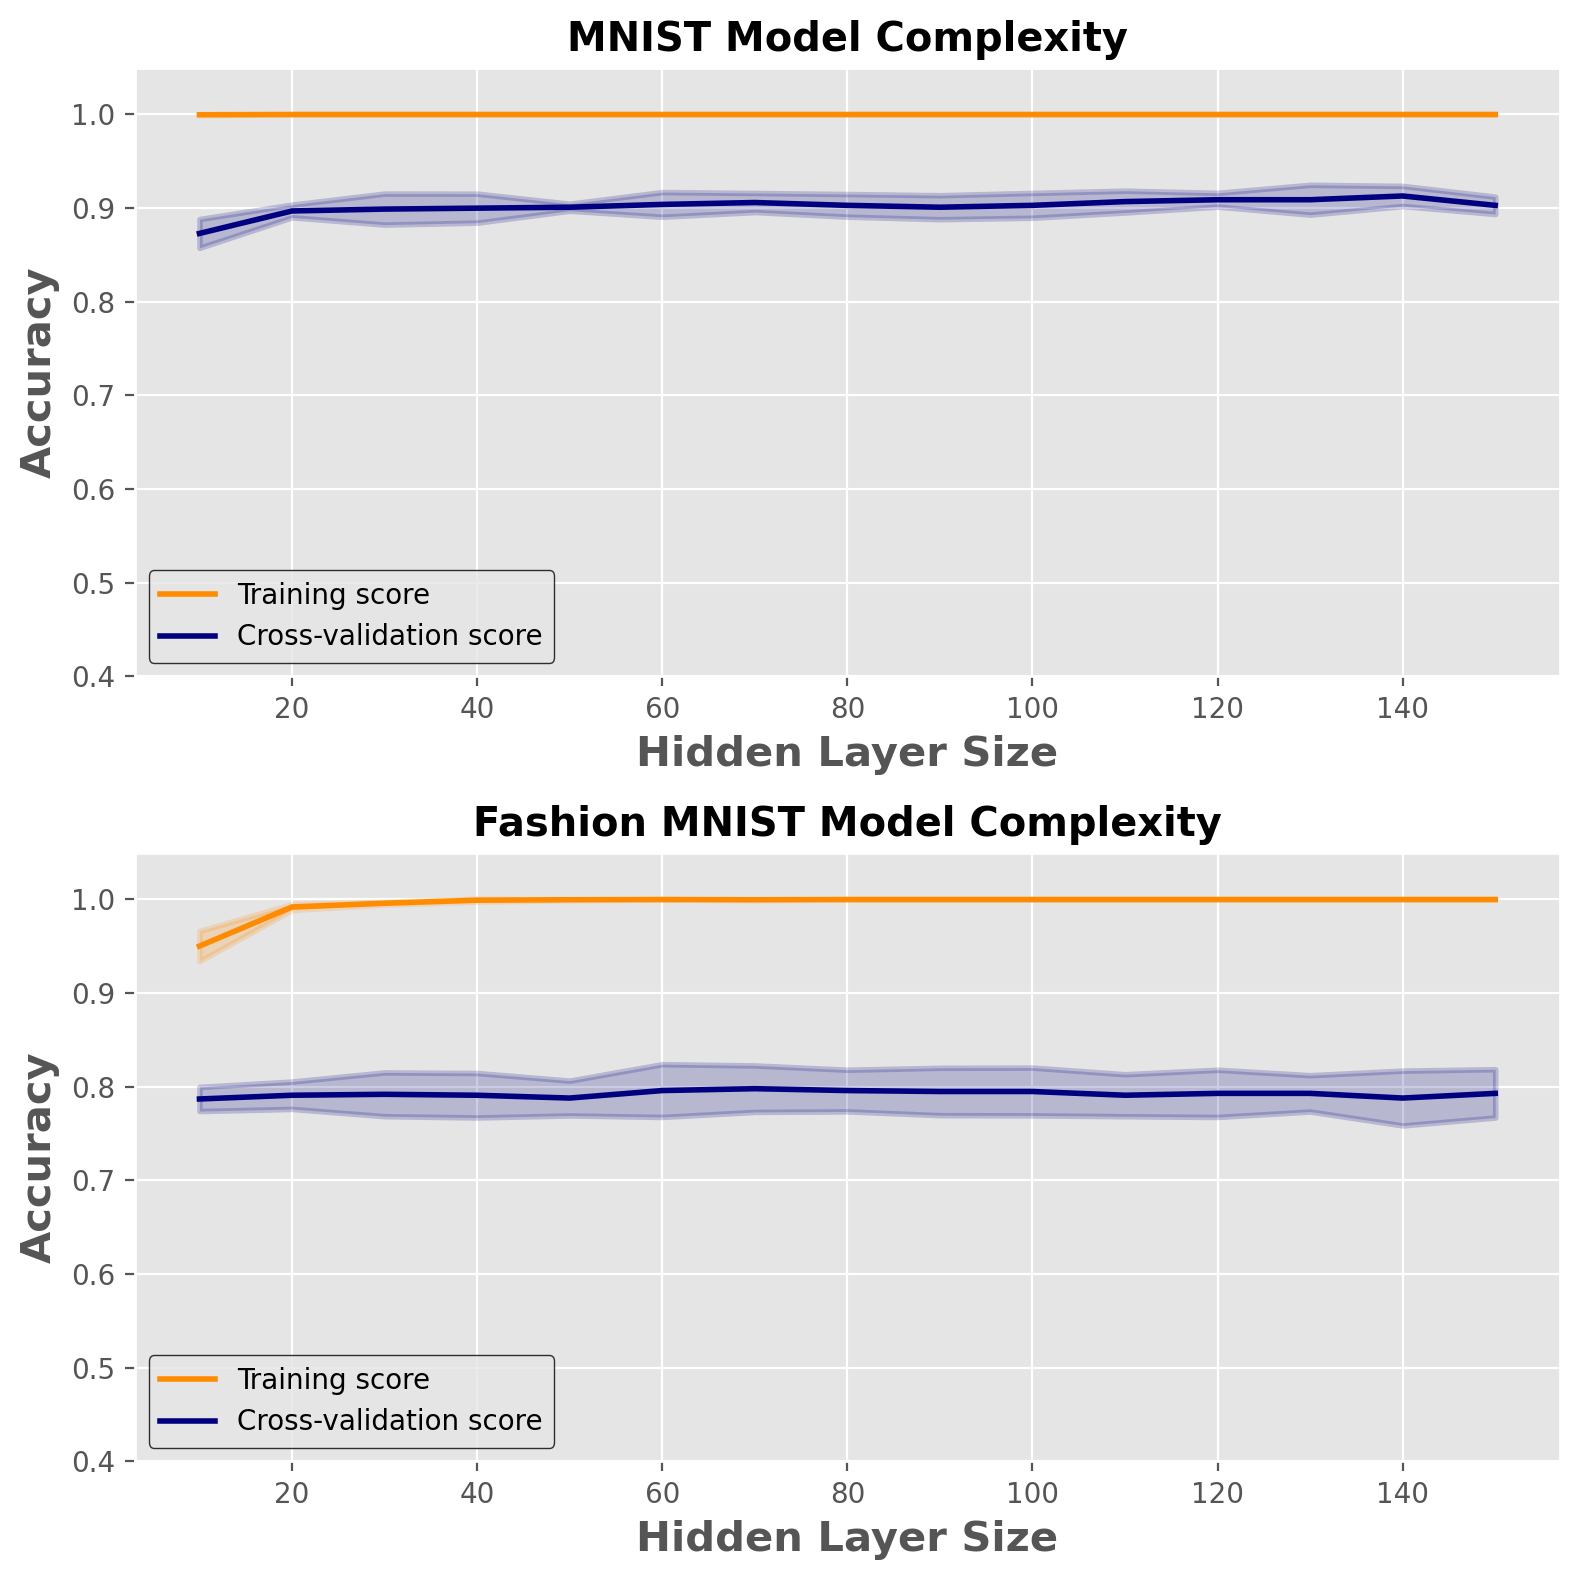

In [9]:
utl.plot_combined_complexity("NeuralNetwork", "Hidden Layer Size", is_NN=True, is_SVM=False,
                             parameter_range=rng, orientation='Horizontal', plt_width=12, plt_height=6,
                             mnist_train_complex=mnist_train_results, mnist_test_complex=mnist_test_results,
                             fashion_train_complex=fashion_train_results, fashion_test_complex=fashion_test_results,
                             folder="NeuralNetwork", extra_name="HiddenLayer_Sizes_")
utl.plot_combined_complexity("NeuralNetwork", "Hidden Layer Size", is_NN=True, is_SVM=False,
                             parameter_range=rng, orientation='Vertical', plt_height=8,
                             mnist_train_complex=mnist_train_results, mnist_test_complex=mnist_test_results,
                             fashion_train_complex=fashion_train_results, fashion_test_complex=fashion_test_results,
                             folder="NeuralNetwork", extra_name="HiddenLayer_Sizes_Vert")

In [ ]:
val

# Initial Model Complexity: Alpha

In [ ]:
a = np.arange(1, 6.01, 0.25)
if TESTING:
    parameter_range_2 = [0.0001, 0.002]
else:
    parameter_range_2 = a

param_name = "alpha"
param_name_plot = "Alpha"
mnist_train_results_alpha = None
mnist_test_results_alpha = None
fashion_train_results_alpha = None
fashion_test_results_alpha = None

In [ ]:

results = {"MNIST": None,
           "Fashion MNIST": None}

start_time = time.time()
for i in np.arange(2):
    temp_results = {"Training Results": None,
                    "Testing Results": None}
    if i == 0:
        temp_train_X = train_X.iloc[:val, :]
        temp_train_y = train_y.iloc[:val]
        f_name = f"{model_name}_{param_name}_MNIST"
        ex = "NN_ALPHA_MNIST_COMPLEXITY"
        algorithm_name = f"{model_name} {param_name} MNIST\n Model Complexity"
        plot_title = f"{model_name} MNIST\n Model Complexity"
        clf = MLPClassifier(hidden_layer_sizes=(20, ) , solver='adam', max_iter=400)
    else:
        temp_train_X = fashion_train_X.iloc[:val, :]
        temp_train_y = fashion_train_y.iloc[:val]
        f_name = f"{model_name}_{param_name}_Fashion_MNIST"
        ex = "NN_ALPHA_FASHION_MNIST_COMPLEXITY"
        algorithm_name = f"{model_name} {param_name} Fashion MNIST\n Model Complexity"
        plot_title = f"{model_name} Fashion MNIST\n Model Complexity"
        clf = MLPClassifier(hidden_layer_sizes=(40, ) , solver='adam', max_iter=400)
    
    temp_train, temp_test = utl.get_model_complexity(classifier=clf, train_X=temp_train_X,
                                                     train_y=temp_train_y, parameter_name=param_name,
                                                     save_dir=save_directory,
                                                     algorithm_name=algorithm_name, parameter_range=parameter_range_2,
                                                     cv=5,
                                                     n_jobs=n_jobs, verbose=5, backend='loky',
                                                     param_name_for_plot=param_name_plot, f_name=f_name,
                                                     is_NN=True, nn_range=parameter_range_2, plot_title=plot_title,
                                                     extra_name="alpha", folder="NeuralNetwork", fileName=ex)
    if i == 0:
        mnist_train_results_alpha = temp_train
        mnist_test_results_alpha = temp_test
    else:
        fashion_train_results_alpha = temp_train
        fashion_test_results_alpha = temp_test

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Run Time: {elapsed_time}s")

In [ ]:
utl.plot_combined_complexity("NeuralNetwork", "Alpha", is_NN=True, is_SVM=False,
                             parameter_range=parameter_range_2, orientation='Horizontal', plt_width=12, plt_height=6,
                             mnist_train_complex=mnist_train_results_alpha, mnist_test_complex=mnist_test_results_alpha,
                             fashion_train_complex=fashion_train_results_alpha, extra_name="ALPHA_COMBINED_____",
                             fashion_test_complex=fashion_test_results_alpha, folder="NeuralNetwork", use_log_x=False)
utl.plot_combined_complexity("NeuralNetwork", "Alpha", is_NN=True, is_SVM=False,
                             parameter_range=parameter_range_2, orientation='Vertical', plt_height=8,
                             mnist_train_complex=mnist_train_results_alpha, mnist_test_complex=mnist_test_results_alpha,
                             fashion_train_complex=fashion_train_results_alpha, extra_name="ALPHA_COMBINED_vert______",
                             fashion_test_complex=fashion_test_results_alpha, folder="NeuralNetwork", use_log_x=False)

# Initial Confusion Matrix

In [ ]:

initial_nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=400, random_state=Random_Number,
                           verbose=True)

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=400, random_state=Random_Number, verbose=False)
clf.fit(train_X.iloc[:val, :], train_y.iloc[:val])

clf2 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=400, random_state=Random_Number, verbose=False)
clf2.fit(fashion_train_X.iloc[:val, :], fashion_train_y.iloc[:val])

In [ ]:
utl.plot_combined_confusion_matrix(clf, valid_X, valid_y, clf2, fashion_valid_X, fashion_valid_y,
                                   directory=save_directory, fmt=None, plot_width=12, plot_height=6,
                                   extra_name="Initial_Confusion", folder="NeuralNetwork")

# Initial Learning Curve

In [ ]:
start_time = time.time()
results = []
for i in range(2):
    print(f"Working on learning curve: {i}")
    res = {"plt": None,
           "nn_results": None,
           "cv_results": None}
    if i == 0:
        temp_train_X = train_X.iloc[:val, :]
        temp_train_y = train_y.iloc[:val]
        title = f"{model_name} MNIST\n Learning Curve"
        f_name = f"{model_name}_MNIST"
    else:
        temp_train_X = fashion_train_X.iloc[:val, :]
        temp_train_y = fashion_train_y.iloc[:val]
        title = f"{model_name} Fashion MNIST\n Learning Curve"
        f_name = f"{model_name}_Fashion_MNIST"
    
    res['nn_results'], res['cv_results'] = utl.plot_learning_curve(estimator=MLPClassifier(hidden_layer_sizes=(100,),
                                                                                           max_iter=400,
                                                                                           random_state=Random_Number,
                                                                                           verbose=False),
                                                                   title=title, train_X=temp_train_X,
                                                                   train_y=temp_train_y, cv=cv,
                                                                   folder="NeuralNetwork", f_name=f_name,
                                                                   train_sizes=train_sizes,
                                                                   save_individual=True, TESTING=True, backend='loky')
    
    results.append(res)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Run Time: {elapsed_time}s")


# Initial Metrics

In [ ]:
clf = MLPClassifier() # need to change to reflect learning curve results
p, r, f1 = utl.plot_precision_recall(clf, train_X.iloc[:2000, :], train_y.iloc[:2000], valid_X.iloc[:2000, :],
                                 valid_y.iloc[:2000], folder="NeuralNetwork", dataset_name="MNIST",
                                 plot_title="Neural Network")

# Gridsearch

In [ ]:
if TESTING:
    all_parameters = {
        'solver': ['adam'],
        'alpha': [0.01, 0.02]
    }
else:
    all_parameters = {
        'solver': ['adam', 'sgd'],
        'alpha': 10. ** np.arange(-5, 5, 1)
    }
best_mnist_estimator = None
best_fashion_estimator = None

In [ ]:
for i in range(2):
    if i == 0:
        temp_train_X = train_X.iloc[:3000, :]
        temp_train_y = train_y.iloc[:3000]
        algorithm_name = f"{model_name}_MNIST"
    else:
        temp_train_X = fashion_train_X.iloc[:val, :]
        temp_train_y = fashion_train_y.iloc[:val]
        algorithm_name = f"{model_name}_Fashion_MNIST"
    
    grid_results_mnist, optimized_nn_mnist = utl.run_grid_search(
        classifier=MLPClassifier(hidden_layer_sizes=(100,), max_iter=400, random_state=Random_Number,
                                 verbose=True, learning_rate='adaptive'), parameters=all_parameters,
        train_X=temp_train_X, train_y=temp_train_y, cv=cv,
        n_jobs=n_jobs, verbose=5, return_train_score=True, refit=True,
        save_dir=save_directory, algorithm_name=algorithm_name, backend='loky', folder="NeuralNetwork")
    if i == 0:
        best_mnist_estimator = optimized_nn_mnist.best_estimator_
    else:
        best_fashion_estimator = optimized_nn_mnist.best_estimator_

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Run Time: {elapsed_time}s")

# Final Learning Curve

In [ ]:

start_time = time.time()
results = []
for i in range(2):
    print(f"Working on learning curve: {i}")
    res = {"plt": None,
           "nn_results": None,
           "cv_results": None}
    if i == 0:
        temp_train_X = train_X.iloc[:val, :]
        temp_train_y = train_y.iloc[:val]
        title = f"{model_name} MNIST\n Learning Curve"
        f_name = f"{model_name}_MNIST"
        optimized_nn = MLPClassifier(hidden_layer_sizes=(20, ) , solver='adam', max_iter=400, alpha=1.0)
    else:
        temp_train_X = fashion_train_X.iloc[:val, :]
        temp_train_y = fashion_train_y.iloc[:val]
        title = f"{model_name} Fashion MNIST\n Learning Curve"
        f_name = f"{model_name}_Fashion_MNIST"
        optimized_nn = MLPClassifier(hidden_layer_sizes=(40, ) , solver='adam', max_iter=400, alpha=1.0)
    
    res['nn_results'], res['cv_results'] = utl.plot_learning_curve(estimator=optimized_nn, title=title,
                                                                   train_X=temp_train_X, train_y=temp_train_y, cv=cv,
                                                                   f_name=f_name, train_sizes=train_sizes,
                                                                   folder='NeuralNetwork',
                                                                   save_individual=True, TESTING=True, backend='loky',
                                                                   n_jobs=n_jobs,
                                                                   extra_name="Final_Learning_Curve")
    results.append(res)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Run Time: {elapsed_time}s")


# Final Confusion Matrix on Test set "(O_o)"

In [ ]:
utl.plot_combined_confusion_matrix(best_mnist_estimator, test_X, test_y, best_fashion_estimator, fashion_test_X,
                                   fashion_test_y,
                                   directory=save_directory, fmt=None, plot_width=12, plot_height=6,
                                   folder="NeuralNetwork")


# Final Metrics

In [ ]:
p, r, f1 = utl.plot_precision_recall(best_mnist_estimator, train_X.iloc[:val, :], train_y.iloc[:val], test_X.iloc[:val, :],
                                 test_y.iloc[:val], folder="NeuralNetwork", dataset_name="MNIST",
                                 plot_title="Neural Network Test Set", is_final=True)

In [ ]:
p, r, f1 = utl.plot_precision_recall(best_mnist_estimator, fashion_train_X.iloc[:val, :], fashion_train_y.iloc[:val],
                                     fashion_test_X.iloc[:val, :],
                                 fashion_test_y.iloc[:val], folder="NeuralNetwork", dataset_name="Fashion MNIST",
                                 plot_title="Neural Network Test Set", is_final=True)